In [13]:
import pandas as ps
import matplotlib.pyplot as mt
import seaborn as sb
import numpy as np
import plotly.graph_objects as gg


### reading csv data

In [14]:
atp = ps.read_csv('atp_matches_2023.csv')
atp['tourney_date'] = ps.to_datetime(atp['tourney_date'] , format='%Y%m%d')
atp.count()

tourney_id            2986
tourney_name          2986
surface               2933
draw_size             2986
tourney_level         2986
tourney_date          2986
match_num             2986
winner_id             2986
winner_seed           1250
winner_entry           473
winner_name           2986
winner_hand           2986
winner_ht             2782
winner_ioc            2986
winner_age            2985
loser_id              2986
loser_seed             769
loser_entry            695
loser_name            2986
loser_hand            2986
loser_ht              2650
loser_ioc             2986
loser_age             2979
score                 2986
best_of               2986
round                 2986
minutes               2754
w_ace                 2815
w_df                  2815
w_svpt                2815
w_1stIn               2815
w_1stWon              2815
w_2ndWon              2815
w_SvGms               2815
w_bpSaved             2815
w_bpFaced             2815
l_ace                 2815
l

In [15]:
atp = ps.read_csv('atp_matches_2023.csv')
atp['year'] = 2023
atp1 = ps.read_csv('atp_matches_2022.csv')
atp1['year'] = 2022
atp2 = ps.read_csv('atp_matches_2021.csv')
atp2['year'] = 2021
atp3 = ps.read_csv('atp_matches_2020.csv')
atp3['year'] = 2020
compressed_df = ps.concat([atp,atp1], axis = 0, ignore_index=True)
compressed_df = ps.concat([compressed_df,atp2], axis=0,ignore_index=True)
compressed_df = ps.concat([compressed_df,atp3], axis = 0, ignore_index=True)
compressed_df['tourney_date'] = ps.to_datetime(compressed_df['tourney_date'] , format='%Y%m%d')
atp = compressed_df

In [16]:
atp

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'year'],
      dtype='object')

#### creating match ID and splitting match set details to lowest granuality

In [17]:
atp['score']

0         7-6(4) 7-6(6)
1           6-2 0-0 RET
2         7-6(5) 7-6(5)
3               6-3 6-3
4        4-6 7-6(2) 6-4
              ...      
10093       6-2 3-6 6-3
10094           7-5 7-5
10095        7-6(5) 6-1
10096           7-5 6-2
10097           6-4 6-3
Name: score, Length: 10098, dtype: object

In [18]:
atp['match_id'] = atp['tourney_id'].astype(str).str.cat(atp['match_num'].astype(str), sep = '')


In [19]:
split_scores = atp['score'].str.split(' ', expand = True)
split_scores = split_scores.reindex(columns=range(5))
atp[['set1', 'set2', 'set3', 'set4', 'set5']] = split_scores

cols = ['set1' , 'set2', 'set3','set4','set5']
for column in atp[['set1','set2', 'set3','set4','set5']]:
    atp.loc[atp[column].str.contains('-') == False , column] = '0-0'
    atp[column].fillna(value = '0-0', inplace=True)
atp.drop(['winner_seed','winner_entry','loser_seed','loser_entry'] , axis = 1 , inplace=True)
atp[['set1','set2','set3','set4','set5']].fillna('0-0', inplace = True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_39468\2362449487.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atp[['set1','set2','set3','set4','set5']].fillna('0-0', inplace = True)


#### set point difference creation 

In [20]:
import regex


atp.reset_index(inplace = True)
atp.drop(atp[atp['set3'].str.contains('\[', regex=True)].index, axis=0, inplace=True)


In [21]:
winner_stats = atp[['match_id','surface','tourney_level','set1' , 'set2', 'set3','winner_rank' , 'winner_id' , 'winner_hand' , 'winner_ht' , 'winner_age' , 'score' , 'minutes', 'w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms', 'w_bpSaved','w_bpFaced','winner_rank_points']]
loser_stats = atp[['match_id','surface','tourney_level','set1' , 'set2', 'set3','loser_rank' , 'loser_id' , 'loser_hand' , 'loser_ht' , 'loser_age' , 'score' , 'minutes', 'l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms', 'l_bpSaved','l_bpFaced','loser_rank_points']]
#rename columns of both df into generic form by removing 'winner_', 'w_',l+','loser_' suffixes and adding ''ply_' for later concatenation 
winner_stats.columns  = [col.replace('winner_', 'ply_') for col in winner_stats.columns]
winner_stats.columns  = [col.replace('w_', 'ply_') for col in winner_stats.columns]
loser_stats.columns  = [col.replace('loser_', 'ply_') for col in loser_stats.columns]
loser_stats.columns  = [col.replace('l_', 'ply_') for col in loser_stats.columns]
winner_stats = winner_stats.reset_index(drop=True)
loser_stats = loser_stats.reset_index(drop=True)
winner_stats = winner_stats.replace('ND', '0.0' )
loser_stats = loser_stats.replace('ND', '0.0' )

In [22]:
def winnerset_pnt_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores1 = scrcs['set1'][i]
        scores1 = scores1.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores1 = [float(string) for string in scores1]
        diff1 = float_scores1[0] - float_scores1[1]
        scrcs.loc[[i],'set1_pnt_diff'] = diff1

        scores2 = scrcs['set2'][i]
        scores2 = scores2.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores2 = [float(string) for string in scores2]
        diff2 = float_scores2[0] - float_scores2[1]
        scrcs.loc[[i],'set2_pnt_diff'] = diff2
        
        scores = scrcs['set3'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').replace('[',' ').replace(']','').split()
        float_scores = [float(string) for string in scores]
        diff3 = float_scores[0] - float_scores[1]
        scrcs.loc[[i],'set3_pnt_diff'] = diff3



winnerset_pnt_diff(winner_stats)



In [23]:
def loserset_pnt_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores1 = scrcs['set1'][i]
        scores1 = scores1.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores1 = [float(string) for string in scores1]
        diff1 = - float_scores1[0] + float_scores1[1]
        scrcs.loc[[i],'set1_pnt_diff'] = diff1

        scores2 = scrcs['set2'][i]
        scores2 = scores2.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores2 = [float(string) for string in scores2]
        diff2 = - float_scores2[0] + float_scores2[1]
        scrcs.loc[[i],'set2_pnt_diff'] = diff2
        
        scores = scrcs['set3'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').replace('[',' ').replace(']','').split()
        float_scores = [float(string) for string in scores]
        diff3 = - float_scores[0] + float_scores[1]
        scrcs.loc[[i],'set3_pnt_diff'] = diff3

loserset_pnt_diff(loser_stats)

In [24]:
loser_stats.head(3)

,match_id,surface,tourney_level,set1,set2,set3,ply_rank,ply_id,ply_hand,ply_ht,...,ply_1stIn,ply_1stWon,ply_2ndWon,ply_SvGms,ply_bpSaved,ply_bpFaced,ply_rank_points,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff
0,2023-9900300,Hard,A,7-6(4),7-6(6),0-0,16.0,126610,R,196.0,...,62.0,47.0,15.0,12.0,9.0,9.0,2375.0,-1.0,-1.0,0.0
1,2023-9900299,Hard,A,6-2,0-0,0-0,23.0,207518,R,185.0,...,12.0,8.0,3.0,4.0,1.0,3.0,1865.0,-4.0,0.0,0.0
2,2023-9900296,Hard,A,7-6(5),7-6(5),0-0,10.0,128034,R,196.0,...,62.0,51.0,7.0,12.0,2.0,2.0,2905.0,-1.0,-1.0,0.0


### OT meta data
#### creating columns that denotes the OT sets

In [25]:
def winnerset_pnt_ot_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores1 = scrcs['set1'][i]
        scores1 = scores1.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores1 = [float(string) for string in scores1]
        if len(float_scores1) == 3:
            if float_scores1[2] <6:
                if float_scores1[0] > float_scores1[1]:
                     diff1 = 7 - float_scores1[2]
                else:
                    diff1 = float_scores1[2] - 7
                scrcs.loc[[i],'set1_ot_diff'] = diff1
            elif (float_scores1[2] > 5) :
                if float_scores1[0] > float_scores1[1]:
                    diff1 = 10 - float_scores1[2]
                    scrcs.loc[[i],'set1_ot_diff'] = diff1
                else:
                    diff1 =  float_scores1[2] - 10
                    scrcs.loc[[i],'set1_ot_diff'] = diff1
        elif len(float_scores2) == 2:
                scrcs.loc[[i],'set1_ot_diff'] = 0

        scores2 = scrcs['set2'][i]
        scores2 = scores2.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores2 = [float(string) for string in scores2]
        if len(float_scores2) == 3:
            if float_scores2[2] <6:
                if float_scores2[0] >float_scores2[1]:
                    diff2 = 7 - float_scores2[2]
                else:
                     diff2 =  float_scores2[2] -7
                scrcs.loc[[i],'set2_ot_diff'] = diff2
            elif (float_scores2[2] > 5):
                if float_scores2[0] >float_scores2[1]:
                    diff2 = 10 - float_scores2[2]
                    scrcs.loc[[i],'set2_ot_diff'] = diff2
                else:
                    diff2 = float_scores2[2] - 10
                    scrcs.loc[[i],'set2_ot_diff'] = diff2 
        elif len(float_scores2) == 2:
                scrcs.loc[[i],'set2_ot_diff'] = 0


        scores3 = scrcs['set3'][i]


winnerset_pnt_ot_diff(winner_stats)

In [26]:
winner_stats[['set1','set1_ot_diff','set2','set2_ot_diff']]

,set1,set1_ot_diff,set2,set2_ot_diff
0,7-6(4),3.0,7-6(6),4.0
1,6-2,NaN,0-0,0.0
2,7-6(5),2.0,7-6(5),2.0
3,6-3,NaN,6-3,0.0
4,4-6,0.0,7-6(2),5.0
...,...,...,...,...
10071,6-2,NaN,3-6,0.0
10072,7-5,0.0,7-5,0.0
10073,7-6(5),2.0,6-1,0.0
10074,7-5,0.0,6-2,0.0


In [27]:
def loserset_pnt_ot_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores1 = scrcs['set1'][i]
        scores1 = scores1.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores1 = [float(string) for string in scores1]
        if len(float_scores1) == 3:
            if float_scores1[2] <6:
                if float_scores1[0] > float_scores1[1]:
                     diff1 = -7 + float_scores1[2]
                else:
                    diff1 = - float_scores1[2] + 7
                scrcs.loc[[i],'set1_ot_diff'] = diff1
            elif (float_scores1[2] > 5) :
                if float_scores1[0] > float_scores1[1]:
                    diff1 = -10 + float_scores1[2]
                    scrcs.loc[[i],'set1_ot_diff'] = diff1
                else:
                    diff1 = - float_scores1[2] +10

                    scrcs.loc[[i],'set1_ot_diff'] = diff1
        elif len(float_scores2) == 2:
                scrcs.loc[[i],'set1_ot_diff'] = 0

        scores2 = scrcs['set2'][i]
        scores2 = scores2.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores2 = [float(string) for string in scores2]
        if len(float_scores2) == 3:
            if float_scores2[2] <6:
                if float_scores2[0] >float_scores2[1]:
                    diff2 = -7 + float_scores2[2]
                else:
                     diff2 =  -float_scores2[2] +7
                scrcs.loc[[i],'set2_ot_diff'] = diff2
            elif (float_scores2[2] > 5):
                if float_scores2[0] >float_scores2[1]:
                    diff2 = -10 + float_scores2[2]
                    scrcs.loc[[i],'set2_ot_diff'] = diff2
                else:
                    diff2 =  -float_scores2[2] + 10
                    scrcs.loc[[i],'set2_ot_diff'] = diff2 
        elif len(float_scores2) == 2:
                scrcs.loc[[i],'set2_ot_diff'] = 0



loserset_pnt_ot_diff(loser_stats)

In [28]:
loser_stats[['set1','set1_ot_diff','set2','set2_ot_diff']]

,set1,set1_ot_diff,set2,set2_ot_diff
0,7-6(4),-3.0,7-6(6),-4.0
1,6-2,NaN,0-0,0.0
2,7-6(5),-2.0,7-6(5),-2.0
3,6-3,NaN,6-3,0.0
4,4-6,0.0,7-6(2),-5.0
...,...,...,...,...
10071,6-2,NaN,3-6,0.0
10072,7-5,0.0,7-5,0.0
10073,7-6(5),-2.0,6-1,0.0
10074,7-5,0.0,6-2,0.0


### creating a column that denotes who won each set

In [29]:
def set_winner(atp):
    for i in range(atp.shape[0]):
        scores1 = atp['set1'][i]
        scores1 = scores1.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores1 = [float(string) for string in scores1]
        if float_scores1[0] > float_scores1[1]:
            atp.loc[[i],'set1_won'] = 1
        elif float_scores1[0] == float_scores1[1]:
            atp.loc[[i],'set1_won'] = 1
        elif float_scores1[0] < float_scores1[1]:
            atp.loc[[i],'set1_won'] = 0

        scores2 = atp['set2'][i]
        scores2 = scores2.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores2 = [float(string) for string in scores2]
        if float_scores2[0] > float_scores2[1]:
            atp.loc[[i],'set2_won'] = 1
        elif float_scores2[0] < float_scores2[1]:
            atp.loc[[i],'set2_won'] = 0

        scores3 = atp['set3'][i]
        scores3 = scores3.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores3 = [float(string) for string in scores3]
        if float_scores3[0] > float_scores3[1]:
            atp.loc[[i],'set3_won'] = 1
        elif float_scores3[0] < float_scores3[1]:
            atp.loc[[i],'set3_won'] = 0

set_winner(winner_stats)


In [30]:
set_winner(loser_stats)

In [31]:
winner_stats

,match_id,surface,tourney_level,set1,set2,set3,ply_rank,ply_id,ply_hand,ply_ht,...,ply_bpFaced,ply_rank_points,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff,set1_ot_diff,set2_ot_diff,set1_won,set2_won,set3_won
0,2023-9900300,Hard,A,7-6(4),7-6(6),0-0,9.0,126203,R,193.0,...,0.0,3355.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,NaN
1,2023-9900299,Hard,A,6-2,0-0,0-0,19.0,126207,R,188.0,...,3.0,2000.0,4.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN
2,2023-9900296,Hard,A,7-6(5),7-6(5),0-0,9.0,126203,R,193.0,...,4.0,3355.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,NaN
3,2023-9900295,Hard,A,6-3,6-3,0-0,19.0,126207,R,188.0,...,5.0,2000.0,3.0,3.0,0.0,NaN,0.0,1.0,1.0,NaN
4,2023-9900292,Hard,A,4-6,7-6(2),6-4,4.0,126774,R,193.0,...,2.0,5550.0,-2.0,1.0,2.0,0.0,5.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10071,2020-7485125,Hard,A,6-2,3-6,6-3,35.0,105554,R,175.0,...,3.0,1384.0,4.0,-3.0,3.0,NaN,0.0,1.0,0.0,1.0
10072,2020-7485126,Hard,A,7-5,7-5,0-0,528.0,200267,R,185.0,...,9.0,58.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,NaN
10073,2020-7485128,Hard,A,7-6(5),6-1,0-0,28.0,126203,R,193.0,...,0.0,1670.0,1.0,5.0,0.0,2.0,0.0,1.0,1.0,NaN
10074,2020-7485129,Hard,A,7-5,6-2,0-0,90.0,144750,R,193.0,...,2.0,748.0,2.0,4.0,0.0,0.0,0.0,1.0,1.0,NaN


In [32]:
ply_stats = ps.concat([winner_stats,loser_stats], axis = 0 , ignore_index= True)
ply_stats

,match_id,surface,tourney_level,set1,set2,set3,ply_rank,ply_id,ply_hand,ply_ht,...,ply_bpFaced,ply_rank_points,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff,set1_ot_diff,set2_ot_diff,set1_won,set2_won,set3_won
0,2023-9900300,Hard,A,7-6(4),7-6(6),0-0,9.0,126203,R,193.0,...,0.0,3355.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,NaN
1,2023-9900299,Hard,A,6-2,0-0,0-0,19.0,126207,R,188.0,...,3.0,2000.0,4.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN
2,2023-9900296,Hard,A,7-6(5),7-6(5),0-0,9.0,126203,R,193.0,...,4.0,3355.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,NaN
3,2023-9900295,Hard,A,6-3,6-3,0-0,19.0,126207,R,188.0,...,5.0,2000.0,3.0,3.0,0.0,NaN,0.0,1.0,1.0,NaN
4,2023-9900292,Hard,A,4-6,7-6(2),6-4,4.0,126774,R,193.0,...,2.0,5550.0,-2.0,1.0,2.0,0.0,5.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20147,2020-7485125,Hard,A,6-2,3-6,6-3,79.0,106099,R,185.0,...,7.0,802.0,-4.0,3.0,-3.0,NaN,0.0,1.0,0.0,1.0
20148,2020-7485126,Hard,A,7-5,7-5,0-0,45.0,105077,L,188.0,...,9.0,1165.0,-2.0,-2.0,0.0,0.0,0.0,1.0,1.0,NaN
20149,2020-7485128,Hard,A,7-6(5),6-1,0-0,33.0,124187,R,211.0,...,5.0,1402.0,-1.0,-5.0,0.0,-2.0,0.0,1.0,1.0,NaN
20150,2020-7485129,Hard,A,7-5,6-2,0-0,74.0,144895,L,178.0,...,11.0,838.0,-2.0,-4.0,0.0,0.0,0.0,1.0,1.0,NaN


In [33]:
ply_stats = ply_stats[ply_stats['set3'] != '0-0']

In [34]:
ply_stats

,match_id,surface,tourney_level,set1,set2,set3,ply_rank,ply_id,ply_hand,ply_ht,...,ply_bpFaced,ply_rank_points,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff,set1_ot_diff,set2_ot_diff,set1_won,set2_won,set3_won
4,2023-9900292,Hard,A,4-6,7-6(2),6-4,4.0,126774,R,193.0,...,2.0,5550.0,-2.0,1.0,2.0,0.0,5.0,0.0,1.0,1.0
6,2023-9900288,Hard,A,6-0,6-7(4),7-5,4.0,126774,R,193.0,...,6.0,5550.0,6.0,-1.0,2.0,0.0,-3.0,1.0,0.0,1.0
8,2023-9900284,Hard,A,6-4,3-6,6-3,16.0,126610,R,196.0,...,4.0,2375.0,2.0,-3.0,3.0,0.0,0.0,1.0,0.0,1.0
10,2023-9900280,Hard,A,6-4,5-7,6-4,14.0,111815,L,188.0,...,8.0,2445.0,2.0,-2.0,2.0,0.0,0.0,1.0,0.0,1.0
11,2023-9900279,Hard,A,3-6,7-5,6-3,19.0,126207,R,188.0,...,10.0,2000.0,-3.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20137,2020-7485113,Hard,A,5-7,6-4,6-4,528.0,200267,R,185.0,...,11.0,58.0,2.0,-2.0,-2.0,0.0,0.0,0.0,1.0,1.0
20139,2020-7485115,Hard,A,5-7,6-3,6-4,15.0,105807,R,188.0,...,5.0,2400.0,2.0,-3.0,-2.0,NaN,0.0,0.0,1.0,1.0
20140,2020-7485117,Hard,A,4-6,6-4,6-1,917.0,208134,R,185.0,...,9.0,13.0,2.0,-2.0,-5.0,0.0,0.0,0.0,1.0,1.0
20142,2020-7485119,Hard,A,3-6,7-6(5),6-3,54.0,104755,R,185.0,...,12.0,1030.0,3.0,-1.0,-3.0,0.0,-2.0,0.0,1.0,1.0


In [35]:
ply_stats.dropna(inplace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_39468\3783939313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ply_stats.dropna(inplace=True)


In [36]:
ply_stats = ply_stats[['match_id', 'surface', 'tourney_level', 'set1', 'set2', 'set3',
       'ply_rank', 'ply_id', 'ply_hand', 'ply_ht', 'ply_age', 'score',
       'minutes', 'ply_ace', 'ply_df', 'ply_svpt', 'ply_1stIn', 'ply_1stWon',
       'ply_2ndWon', 'ply_SvGms', 'ply_bpSaved', 'ply_bpFaced',
       'ply_rank_points', 'set1_pnt_diff', 'set2_pnt_diff', 'set3_pnt_diff',
       'set1_ot_diff', 'set2_ot_diff', 'set1_won', 'set2_won', 'set3_won']]
features = ['surface', 'tourney_level', 'set1', 'set2', 'set3',
       'ply_rank', 'ply_id', 'ply_hand', 'ply_ht', 'ply_age', 'score',
       'minutes', 'ply_ace', 'ply_df', 'ply_svpt', 'ply_1stIn', 'ply_1stWon',
       'ply_2ndWon', 'ply_SvGms', 'ply_bpSaved', 'ply_bpFaced',
       'ply_rank_points', 'set1_pnt_diff', 'set2_pnt_diff', 'set3_pnt_diff',
       'set1_ot_diff', 'set2_ot_diff', 'set1_won', 'set2_won']

target = ['set3_won']

In [37]:
ply_stats_enc = ps.get_dummies(ply_stats , columns = ['surface','ply_hand'])


In [38]:
ply_stats_enc['tourney_level'].unique()

array(['A', 'G', 'M', 'F', 'D'], dtype=object)

In [39]:
tourney_level_order = {'A': 0, 'M': 1, 'G': 3, 'F': 2}
ply_stats_enc['tourney_level'] = ply_stats_enc['tourney_level'].map(tourney_level_order)


In [40]:
ply_stats_enc['set3_won'].dropna(axis= 0,inplace=True)

In [41]:
cleaned = ply_stats_enc.dropna(axis=0)
cleaned.reset_index(inplace=True)

In [42]:
cleaned

,index,match_id,tourney_level,set1,set2,set3,ply_rank,ply_id,ply_ht,ply_age,...,set2_ot_diff,set1_won,set2_won,set3_won,surface_Clay,surface_Grass,surface_Hard,ply_hand_L,ply_hand_R,ply_hand_U
0,4,2023-9900292,0.0,4-6,7-6(2),6-4,4.0,126774,193.0,24.3,...,5.0,0.0,1.0,1.0,0,0,1,0,1,0
1,6,2023-9900288,0.0,6-0,6-7(4),7-5,4.0,126774,193.0,24.3,...,-3.0,1.0,0.0,1.0,0,0,1,0,1,0
2,8,2023-9900284,0.0,6-4,3-6,6-3,16.0,126610,196.0,26.7,...,0.0,1.0,0.0,1.0,0,0,1,0,1,0
3,10,2023-9900280,0.0,6-4,5-7,6-4,14.0,111815,188.0,27.3,...,0.0,1.0,0.0,1.0,0,0,1,1,0,0
4,11,2023-9900279,0.0,3-6,7-5,6-3,19.0,126207,188.0,24.9,...,0.0,0.0,1.0,1.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,20130,2020-7485106,0.0,3-6,7-6(7),6-4,17.0,111575,198.0,24.4,...,-3.0,0.0,1.0,1.0,0,0,1,0,1,0
7470,20134,2020-7485110,0.0,4-6,6-3,6-4,55.0,104665,180.0,34.7,...,0.0,0.0,1.0,1.0,0,0,1,0,1,0
7471,20137,2020-7485113,0.0,5-7,6-4,6-4,528.0,200267,185.0,21.3,...,0.0,0.0,1.0,1.0,0,0,1,0,1,0
7472,20140,2020-7485117,0.0,4-6,6-4,6-1,917.0,208134,185.0,17.2,...,0.0,0.0,1.0,1.0,0,0,1,0,1,0


In [43]:
features = [ 'tourney_level',  'ply_rank',
       'ply_id', 'ply_ht', 'ply_age', 'minutes', 'ply_ace', 'ply_df',
       'ply_svpt', 'ply_1stIn', 'ply_1stWon', 'ply_2ndWon', 'ply_SvGms',
       'ply_bpSaved', 'ply_bpFaced', 'ply_rank_points', 'set1_pnt_diff',
       'set2_pnt_diff', 'set3_pnt_diff', 'set1_ot_diff', 'set2_ot_diff',
       'set1_won', 'set2_won',  'surface_Clay', 'surface_Grass',
       'surface_Hard', 'ply_hand_L', 'ply_hand_R']
target =['set3_won']
X = cleaned[features]
y = cleaned[target]

In [46]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [54]:
from sklearn.utils import compute_class_weight


model = xgb.XGBClassifier(use_label_encoder=True, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [55]:

importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = ps.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

            Feature  Importance
12        ply_SvGms    0.409516
0     tourney_level    0.191904
22         set2_won    0.054245
16    set1_pnt_diff    0.041905
21         set1_won    0.036957
8          ply_svpt    0.035435
9         ply_1stIn    0.027479
23     surface_Clay    0.025190
24    surface_Grass    0.018875
7            ply_df    0.017726
14      ply_bpFaced    0.015110
17    set2_pnt_diff    0.014116
18    set3_pnt_diff    0.013799
19     set1_ot_diff    0.012848
10       ply_1stWon    0.011419
2            ply_id    0.009882
5           minutes    0.009060
4           ply_age    0.008763
3            ply_ht    0.008481
6           ply_ace    0.008002
20     set2_ot_diff    0.006525
11       ply_2ndWon    0.005779
15  ply_rank_points    0.005070
1          ply_rank    0.004577
13      ply_bpSaved    0.004105
25     surface_Hard    0.003232
26       ply_hand_L    0.000000
27       ply_hand_R    0.000000


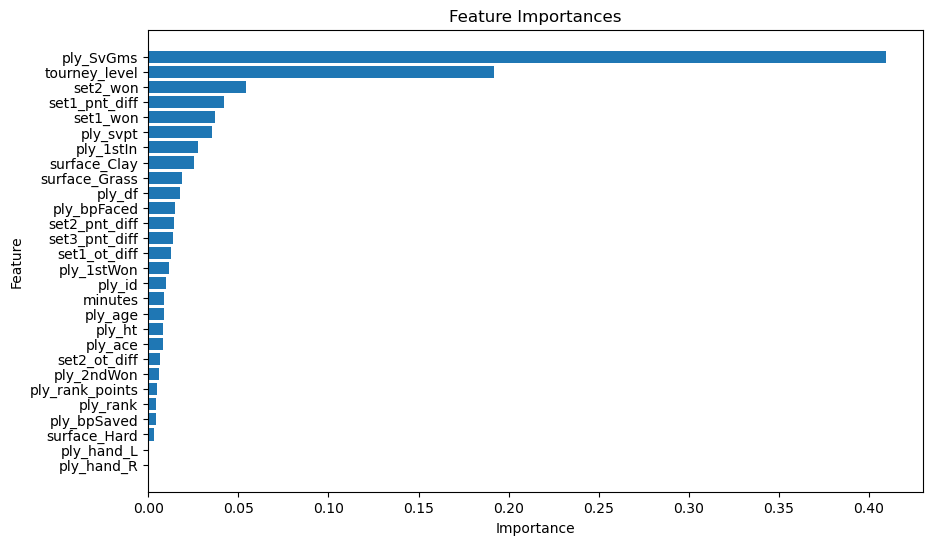

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.show()

In [57]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9953177257525083
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       232
         1.0       1.00      1.00      1.00      2758

    accuracy                           1.00      2990
   macro avg       0.98      0.99      0.98      2990
weighted avg       1.00      1.00      1.00      2990



In [77]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score( model, X, y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Accuracy Scores: [0.99331551 0.99331551 0.99197861 0.9959893  0.99330656 0.99732262
 0.99866131 0.99732262 0.99330656 1.        ]
Mean Accuracy: 0.9954518609196142
Standard Deviation: 0.002620507892637907


In [59]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [83]:
from sklearn.decomposition import PCA


pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)

# Convert the dataset into DMatrix format (used by XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.1,
    'seed': 42
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
preds = bst.predict(dtest)
predictions = [round(value) for value in preds]

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.14%


In [82]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the PCA-transformed data
cv_scores = cross_val_score(xgb.XGBClassifier(**params), X_pca, y, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-validation scores: [0.93181818 0.92780749 0.92914439 0.90775401 0.93172691 0.92637216
 0.93038822 0.93708166 0.9103079  0.92235609]
Mean CV accuracy: 92.55%


In [76]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.57      0.49      0.52       232
         1.0       0.96      0.97      0.96      2758

    accuracy                           0.93      2990
   macro avg       0.76      0.73      0.74      2990
weighted avg       0.93      0.93      0.93      2990

[[ 113  119]
 [  86 2672]]


In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_pca, y)

# Split the resampled data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train the model
model = xgb.XGBClassifier()
model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_res = model.predict(X_test_res)

print(classification_report(y_test_res, y_pred_res))
print(confusion_matrix(y_test_res, y_pred_res))
accuracy = accuracy_score(y_test_res, y_pred_res)
print(f"Accuracy: {accuracy * 100:.2f}%")


              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2049
         1.0       0.98      0.93      0.95      2062

    accuracy                           0.95      4111
   macro avg       0.96      0.96      0.95      4111
weighted avg       0.96      0.95      0.95      4111

[[2017   32]
 [ 153 1909]]
Accuracy: 95.50%
